### Architetture dati - progetto use case "Data management for Machine Learning"

Imports

In [20]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

Caricamento dataset da sklearn e creazione dataframe pandas

In [21]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

Questo dataset ha come target:
* 0 = Maligno
* 1 = Benigno

Presenta 30 features e 569 istanze

In [22]:
#print number of features
print(f"Number of features: {len(data.feature_names)}")
#print number of istances
print(f"Number of istances: {len(df)}")

df.head()

Number of features: 30
Number of istances: 569


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Distribuzione del dataset

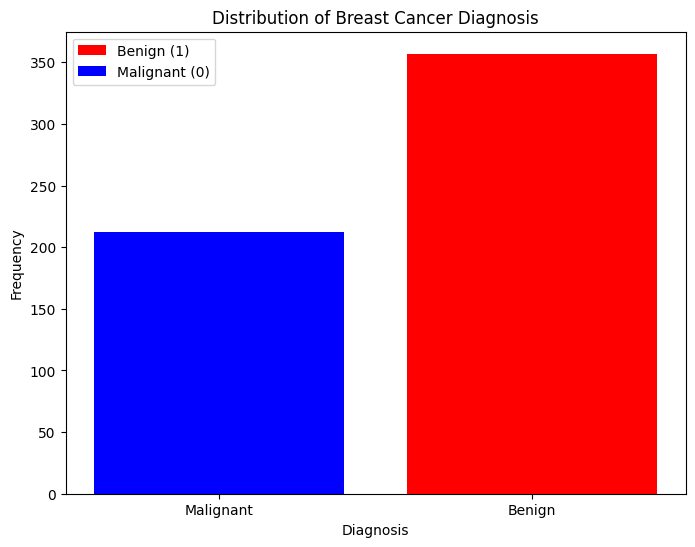

In [36]:
# Count the occurrences of each target value
target_counts = df['target'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index, target_counts.values, color=['red', 'blue'])

# Add title and labels
plt.title('Distribution of Breast Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Malignant', 'Benign'])

# Add a legend
plt.legend(bars, ['Benign (1)', 'Malignant (0)' ])

# Show the plot
plt.show()